In [ ]:
!pip install tensorflow

In [ ]:
# Import the relevant libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import cv2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = '/content/drive/MyDrive/MLDataset/WasteImagesDataset'

In [ ]:
!ls -l {DIR}

total 36
drwx------ 2 root root 4096 Mar  6 11:25  Aluminium
drwx------ 2 root root 4096 Mar  6 11:25  Carton
drwx------ 2 root root 4096 Mar  6 11:25  Glass
drwx------ 2 root root 4096 Mar  6 11:25 'Organic Waste'
drwx------ 2 root root 4096 Mar  6 11:25 'Other Plastics'
drwx------ 2 root root 4096 Mar  6 11:25 'Paper and Cardboard'
drwx------ 2 root root 4096 Mar  6 11:25  Plastic
drwx------ 2 root root 4096 Mar  6 11:25  Textiles
drwx------ 2 root root 4096 Mar  6 11:25  Wood


In [ ]:
import os

if not os.path.exists(DIR):
    raise FileNotFoundError("Directory does not exist.")

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1,
                                                                    subset="training", seed=42,
                                                                    batch_size=16, smart_resize=True)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1,
                                                                  subset="validation", seed=42,
                                                                  batch_size=16, smart_resize=True)

Found 5078 files belonging to 9 classes.
Using 4571 files for training.
Found 5078 files belonging to 9 classes.
Using 507 files for validation.


In [ ]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

## **Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([

    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.inception_v3.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes, numClasses)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood'] 9


## **Basic CNN**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(numClasses, activation='softmax')
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
train_history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

Epoch 1/5
286/286 [==============================] - 494s 2s/step - loss: 2.0508 - accuracy: 0.2649 - val_loss: 1.9947 - val_accuracy: 0.3215
Epoch 2/5
286/286 [==============================] - 48s 166ms/step - loss: 1.9624 - accuracy: 0.2787 - val_loss: 1.9071 - val_accuracy: 0.3254
Epoch 3/5
286/286 [==============================] - 48s 167ms/step - loss: 1.8516 - accuracy: 0.3017 - val_loss: 1.7531 - val_accuracy: 0.3373
Epoch 4/5
286/286 [==============================] - 47s 162ms/step - loss: 1.7238 - accuracy: 0.3433 - val_loss: 1.7083 - val_accuracy: 0.3314
Epoch 5/5
286/286 [==============================] - 50s 173ms/step - loss: 1.6495 - accuracy: 0.3710 - val_loss: 1.5929 - val_accuracy: 0.3787


# **Evaluation**

In [ ]:
model.evaluate(test_dataset)

32/32 [==============================] - 3s 83ms/step - loss: 1.5929 - accuracy: 0.3787


[1.5929116010665894, 0.3786982297897339]

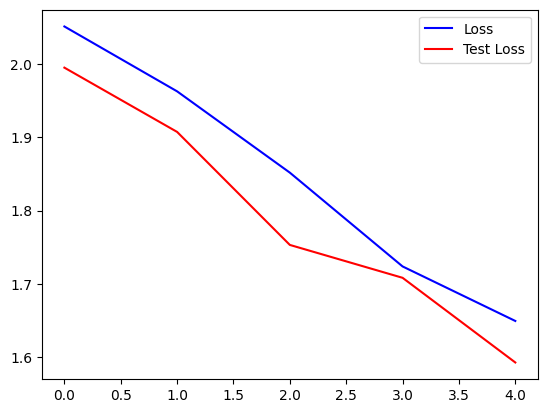

In [ ]:
epochs = 5
plt.plot(range(0, epochs), train_history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), train_history.history["val_loss"], color="r", label="Test Loss")
plt.legend()
plt.show()

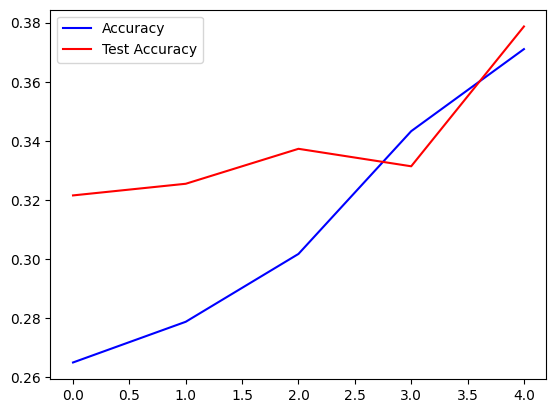

In [ ]:
plt.plot(range(0, epochs), train_history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), train_history.history["val_accuracy"], color="r", label="Test Accuracy")
plt.legend()
plt.show()

Text(0, 0.5, 'Loss')

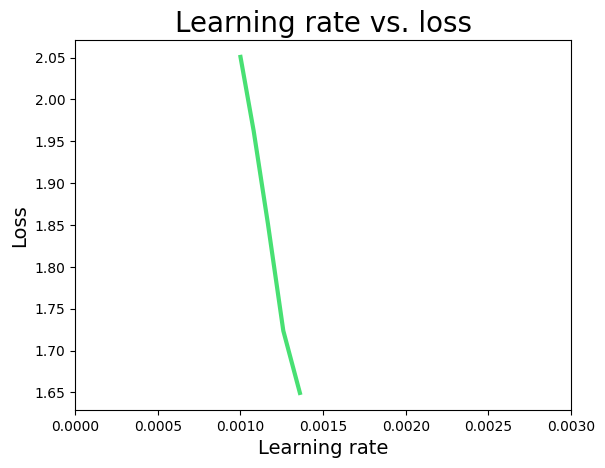

In [ ]:
plt.xlim([0, 0.003])
learning_rates = 1e-3 * (10 ** (np.arange(epochs) / 30))
plt.plot(learning_rates, train_history.history['loss'], lw=3, color='#48e073')
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)

1/1 [==============================] - 0s 29ms/step
[[0.07803171 0.01496688 0.21892288 0.01294945 0.02749649 0.44855437
  0.11015362 0.04859817 0.04032648]]
Prediction: Paper and Cardboard
Prediction: 5
[ 7.803171   1.496688  21.892288   1.2949451  2.7496486 44.85544
 11.015363   4.859817   4.0326486] 
 ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood']


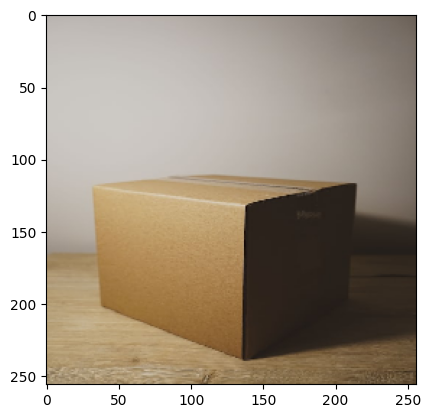

In [ ]:
url = "https://images.unsplash.com/photo-1577705998148-6da4f3963bc8?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8Y2FyZGJvYXJkfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"
image = tf.keras.utils.get_file("Image1.jpg", origin=url)

img = tf.keras.preprocessing.image.load_img(image, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])

plt.imshow(img)
print(predictions)
print("Prediction: " + str(classes[np.argmax(predictions)]))
print("Prediction: " + str(np.argmax(predictions)))

print(predictions[0]*100, "\n", classes)
# print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

In [ ]:
prediction = model.predict(test_dataset)
print(len(prediction))
print(prediction)

32/32 [==============================] - 5s 106ms/step
507
[[0.1025812  0.00572583 0.2736111  ... 0.22870338 0.03754453 0.00980268]
 [0.27345368 0.08380416 0.3927503  ... 0.05803637 0.03472533 0.00413515]
 [0.11478781 0.06751455 0.03466143 ... 0.00905266 0.14419384 0.05462054]
 ...
 [0.19997181 0.12801147 0.04529643 ... 0.0348626  0.20367198 0.00075916]
 [0.17064886 0.06636587 0.04229858 ... 0.00055065 0.05004716 0.03441736]
 [0.50442636 0.23514347 0.13681543 ... 0.01930097 0.00531458 0.00104902]]


In [ ]:
print(prediction, "\n", classes)

for i in prediction:
  print("Prediction: ", classes[np.argmax(i)], np.argmax(i))


[[0.1025812  0.00572583 0.2736111  ... 0.22870338 0.03754453 0.00980268]
 [0.27345368 0.08380416 0.3927503  ... 0.05803637 0.03472533 0.00413515]
 [0.11478781 0.06751455 0.03466143 ... 0.00905266 0.14419384 0.05462054]
 ...
 [0.19997181 0.12801147 0.04529643 ... 0.0348626  0.20367198 0.00075916]
 [0.17064886 0.06636587 0.04229858 ... 0.00055065 0.05004716 0.03441736]
 [0.50442636 0.23514347 0.13681543 ... 0.01930097 0.00531458 0.00104902]] 
 ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood']
Prediction:  Paper and Cardboard 5
Prediction:  Glass 2
Prediction:  Paper and Cardboard 5
Prediction:  Paper and Cardboard 5
Prediction:  Carton 1
Prediction:  Glass 2
Prediction:  Glass 2
Prediction:  Paper and Cardboard 5
Prediction:  Paper and Cardboard 5
Prediction:  Plastic 6
Prediction:  Glass 2
Prediction:  Paper and Cardboard 5
Prediction:  Paper and Cardboard 5
Prediction:  Glass 2
Prediction:  Glass 2
Prediction:  Tex

In [ ]:
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy*100, misclass*100))
    plt.show()

plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
true = []
predictions = []

path = DIR
for i in os.listdir(path):
  folderPath = os.path.join(path, i)
  for j in os.listdir(folderPath)[:550]:
    fullPath = os.path.join(folderPath, j)
    try:
      img = tf.keras.preprocessing.image.load_img(fullPath, target_size=(256, 256))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0)

      preds = model.predict(img_array)
      true.append(classes.index(i))
      predictions.append(np.argmax(preds))
    except:
      print("Error on image:", fullPath)

1/1 [==============================] - 0s 20ms/step


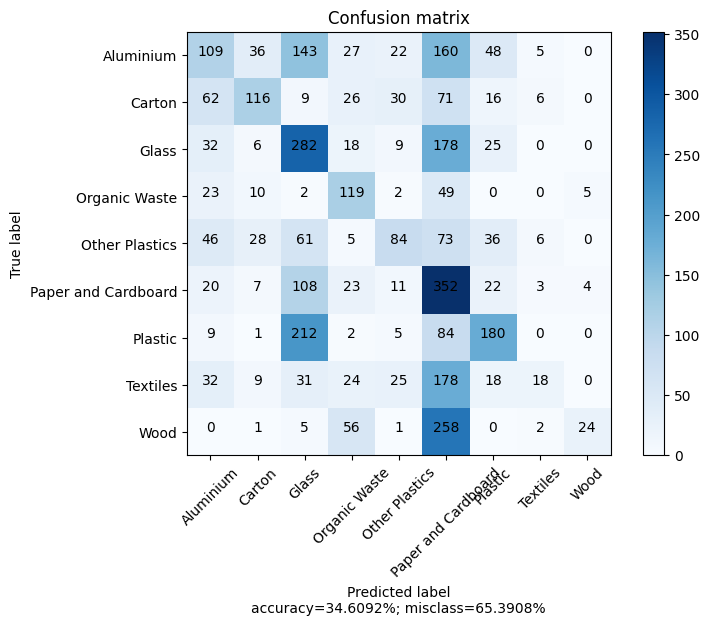

In [ ]:
plot_confusion_matrix(tf.math.confusion_matrix(true, predictions), classes)

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print('Classification Report : \n' + classification_report(true, predictions))

Classification Report : 
              precision    recall  f1-score   support

           0       0.33      0.20      0.25       550
           1       0.54      0.35      0.42       336
           2       0.33      0.51      0.40       550
           3       0.40      0.57      0.47       210
           4       0.44      0.25      0.32       339
           5       0.25      0.64      0.36       550
           6       0.52      0.37      0.43       493
           7       0.45      0.05      0.10       335
           8       0.73      0.07      0.13       347

    accuracy                           0.35      3710
   macro avg       0.44      0.33      0.32      3710
weighted avg       0.42      0.35      0.32      3710

